In [1]:
import pandas as pd

In [2]:
default_data = pd.read_csv('../Data Sets/Default.csv')

In [3]:
default_data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
X = default_data[['balance']]

In [5]:
X.head()

,balance
0,729.526495
1,817.180407
2,1073.549164
3,529.250605
4,785.655883


In [6]:
y = default_data['default']

In [7]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: default, dtype: object

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis(store_covariance=True)

In [10]:
lda.fit(X, y)

LinearDiscriminantAnalysis(store_covariance=True)

In [11]:
lda.intercept_

array([-9.23373937])

In [12]:
lda.coef_

array([[0.00459714]])

In [13]:
lda.means_

array([[ 803.94375023],
       [1747.82168961]])

In [14]:
lda.priors_

array([0.9667, 0.0333])

In [15]:
lda.classes_

array(['No', 'Yes'], dtype='<U3')

In [16]:
lda.covariance_

array([[205277.54986899]])

In [17]:
import numpy as np

In [18]:
x_vals = np.linspace(X.min(), X.max(), 300)

In [20]:
x_vals[:10]

array([[ 0.        ],
       [ 8.87733303],
       [17.75466606],
       [26.63199909],
       [35.50933212],
       [44.38666516],
       [53.26399819],
       [62.14133122],
       [71.01866425],
       [79.89599728]])

In [21]:
x_vals_df = pd.DataFrame(x_vals, columns=['balance'])

In [22]:
x_vals_df.head()

,balance
0,0.000000
1,8.877333
2,17.754666
3,26.631999
4,35.509332


In [27]:
posterior_probs = lda.predict_proba(x_vals_df)[:, 0]

In [28]:
posterior_probs[:10]

array([0.99990232, 0.99989825, 0.99989402, 0.9998896 , 0.999885  ,
       0.99988021, 0.99987523, 0.99987003, 0.99986462, 0.99985898])

In [26]:
lda.classes_

array(['No', 'Yes'], dtype='<U3')

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
i = np.argmin(np.abs(posterior_probs - 0.5))
decision_boundary = x_vals[i]

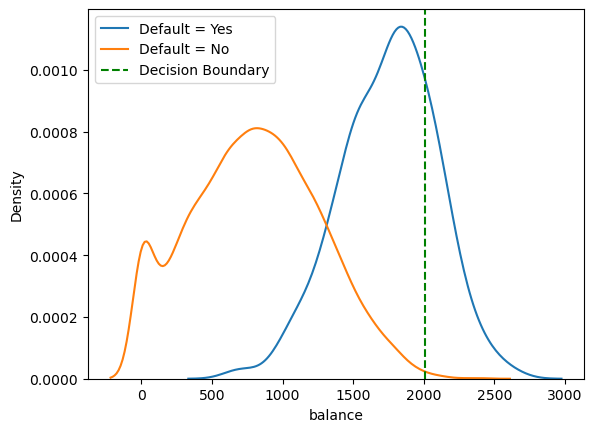

In [42]:
sns.kdeplot(data=default_data[default_data['default'] == 'Yes'], x='balance', label='Default = Yes')
sns.kdeplot(data=default_data[default_data['default'] == 'No'], x='balance', label='Default = No')

plt.axvline(decision_boundary, color='green', linestyle='--', label='Decision Boundary')

plt.legend()

In [44]:
lda.predict(pd.DataFrame(data=[1900], columns=['balance']))

array(['No'], dtype='<U3')

In [45]:
default_data[default_data['default'] == 'No'].count()

default    9667
student    9667
balance    9667
income     9667
dtype: int64

In [46]:
default_data[default_data['default'] == 'Yes'].count()

default    333
student    333
balance    333
income     333
dtype: int64